In [3]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
# import metpy.calc as mpcalc
import numpy as np
import xarray as xr
import glob
import matplotlib.ticker as mticker
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import pandas as pd
# import cmocean.cm as cmo
from matplotlib.patches import Rectangle

In [4]:
# get dataset 
data       = xr.open_dataset("/work/uo1075/u241321/data/u241321/data_cdo/temperature_1969-2019_assi_5000.nc",decode_times=False)
var = np.mean(data['thetao'], axis=1)[:,0:21,:,:]

assi = np.load("/work/uo1075/u241321/data/eemd_t310_assi_Norwegian.npy") # mode(c1-c4), time
# Create time slice from dates

y = assi[2,:]

field = var.stack(spatial=('depth','lat','lon')).dropna(dim="spatial") #time,space

from sklearn.linear_model import LinearRegression
def regression(x,y):

    coef = LinearRegression(fit_intercept=True).fit(x.reshape(-1, 1), y.values.reshape(-1, 1)).coef_
    

    return coef


coe = np.zeros((6, field.shape[1]))

# regression, center on 6-45 (1976-2015), 40 year (start from 0)

for m in range(0,field.shape[1],1):
        coe[0,m] = regression(y[7:47], field[2:42,m])
        coe[1,m] = regression(y[7:47], field[3:43,m])
        coe[2,m] = regression(y[7:47], field[4:44,m])
        coe[3,m] = regression(y[7:47], field[5:45,m])
        coe[4,m] = regression(y[7:47], field[6:46,m])
        coe[5,m] = regression(y[7:47], field[7:47,m])
        
      

In [5]:
coe1 = xr.DataArray(coe,  
                    dims=['mode','spatial'],
                    coords=dict(
                        spatial=field.spatial,
                         mode=np.arange(1,7,1))
                    , )
# field = var.stack(spatial=('lat','lon')).dropna(dim="spatial") #time,space
spatial = field .coords["spatial"]
mode = coe1 .coords["mode"]
reg = xr.DataArray(coe1, dims = ["mode","spatial"], coords = {"mode":mode,"spatial":spatial}).unstack()  

In [6]:
reg.to_netcdf("/work/uo1075/u241321/data/reg_t_ver_tC2_40.nc")

In [7]:
reg

<xarray.DataArray (mode: 6, depth: 21, lat: 90, lon: 150)>
array([[[[            nan,             nan,             nan, ...,
           1.06776139e-01,  9.09033278e-02,  8.19780511e-02],
         [            nan,             nan,             nan, ...,
           1.33002721e-01,  1.17035085e-01,  1.03295207e-01],
         [-2.87270328e-01,             nan,             nan, ...,
           1.08155214e-01,  9.48194598e-02,  8.68294546e-02],
         ...,
         [-9.00274308e-06, -1.23509143e-05, -1.55119895e-05, ...,
          -2.23044583e-04, -2.22300247e-04, -2.21086487e-04],
         [-7.47649728e-05, -7.31601919e-05, -7.16592902e-05, ...,
          -2.17301097e-04, -2.17854063e-04, -2.18479695e-04],
         [-5.18464252e-05, -5.14285067e-05, -5.10065585e-05, ...,
          -1.12126339e-04, -1.11868103e-04, -1.11600986e-04]],

        [[            nan,             nan,             nan, ...,
           1.01412602e-01,  8.64652281e-02,  7.86990559e-02],
         [            nan,             nan,             nan, ...,
           1.42868734e-01,  1.28298240e-01,  1.15210793e-01],
         [-1.61560009e-01,             nan,             nan, ...,
           1.28442476e-01,  1.14610737e-01,  1.05661253e-01],
...
         [-3.78063247e-02, -3.69642476e-02, -3.60907005e-02, ...,
           3.88819109e-02,  4.29678515e-02,  4.70538389e-02],
         [-8.84367903e-04, -2.30045643e-03, -3.62508112e-03, ...,
          -2.07985166e-02, -1.85696451e-02, -1.63879028e-02],
         [-2.30661802e-02, -2.34244159e-02, -2.37858383e-02, ...,
          -2.34733846e-02, -2.31279824e-02, -2.27797036e-02]],

        [[            nan,             nan,             nan, ...,
          -3.14476056e-01, -2.78784543e-01, -2.49053084e-01],
         [            nan,             nan,             nan, ...,
          -2.53779305e-01, -2.24173727e-01, -1.98474891e-01],
         [-2.53967771e-02,             nan,             nan, ...,
          -1.54956787e-01, -1.39209525e-01, -1.22794804e-01],
         ...,
         [-2.47100311e-02, -2.34598048e-02, -2.21799374e-02, ...,
           1.83772504e-02,  2.17417516e-02,  2.51232668e-02],
         [-2.74623123e-02, -2.83704158e-02, -2.92397227e-02, ...,
          -9.19877399e-04, -3.82557933e-06,  8.87337057e-04],
         [-3.71897341e-02, -3.72381178e-02, -3.72960940e-02, ...,
          -1.97547426e-03, -1.68347384e-03, -1.38943061e-03]]]])
Coordinates:
  * depth    (depth) float64 6.0 17.0 27.0 37.0 47.0 ... 485.0 560.0 645.0 740.0
  * lat      (lat) float64 0.5 1.5 2.5 3.5 4.5 5.5 ... 85.5 86.5 87.5 88.5 89.5
  * lon      (lon) float64 -79.5 -78.5 -77.5 -76.5 -75.5 ... 66.5 67.5 68.5 69.5
  * mode     (mode) int64 1 2 3 4 5 6

In [11]:
dat       = xr.open_dataset("/work/uo1075/u241321/data/reg_t_ver_tC2_40.nc")
dat['__xarray_dataarray_variable__'].shape

(6, 21, 90, 150)

In [9]:
dat

<xarray.Dataset>
Dimensions:                        (depth: 21, lat: 90, lon: 150, mode: 6)
Coordinates:
  * depth                          (depth) float64 6.0 17.0 27.0 ... 645.0 740.0
  * lat                            (lat) float64 0.5 1.5 2.5 ... 87.5 88.5 89.5
  * lon                            (lon) float64 -79.5 -78.5 -77.5 ... 68.5 69.5
  * mode                           (mode) int64 1 2 3 4 5 6
Data variables:
    __xarray_dataarray_variable__  (mode, depth, lat, lon) float64 ...

/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


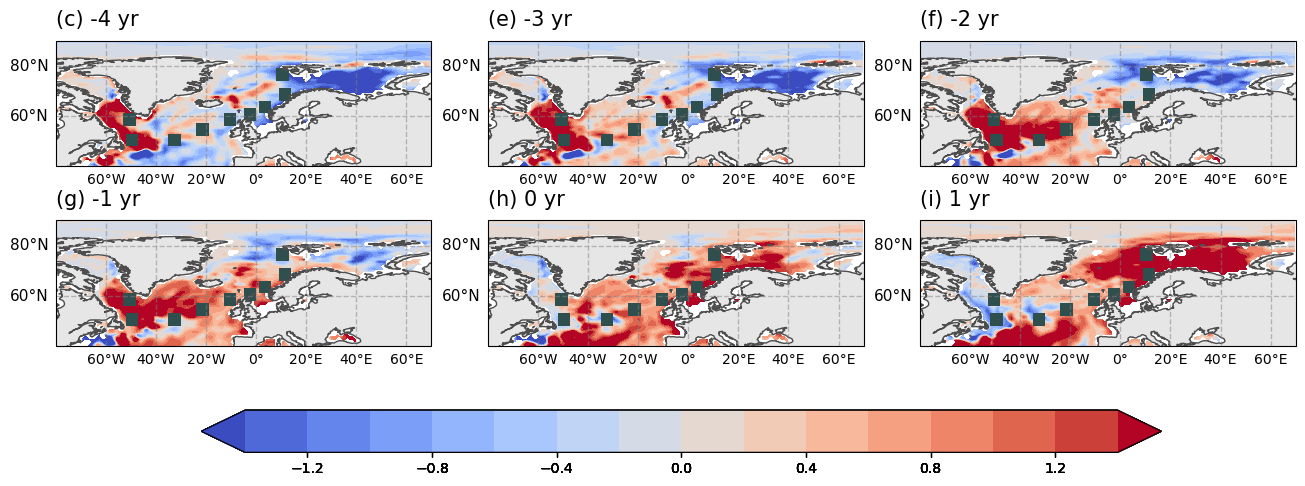

In [10]:
Seas = dat['__xarray_dataarray_variable__'][:,5,:,:]
title = ["(c) -4 yr","(e) -3 yr","(f) -2 yr", "(g) -1 yr",
        "(h) 0 yr","(i) 1 yr"]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,14),subplot_kw={'projection': ccrs.PlateCarree()})

plt.subplots_adjust(hspace=-0.8,wspace =0.15)

for i,ax in enumerate(axes.flat):
    
    p = Seas[i].plot.contourf(ax=ax, x='lon', y='lat',
                levels = np.arange(-1.4, 1.6, 0.2), 
                              cmap='coolwarm',
                              extend = 'both', add_colorbar=False, add_labels=False)

    # p1 = Seas1.plot.contour(ax=ax, x='lon', y='lat', negative_linestyles = 'dashed', colors='black',linewidths =1.1 ,
    #             levels = np.arange(-1, 1.2, 0.2))


    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'coastline', '50m',
                                                  edgecolor='0.3',
                                                  facecolor='0.9'))
    ax.set_title(title[i],size = '15', loc = 'left', pad = 11)

    


    
    #    ax.set_title('',size = '15', loc = 'left', pad = 25)
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top=False
    gl.ylabels_right=False
    gl.xlines = True
    gl.ylines = True
    ax.set_extent([-80,70,40,90])
    gl.xlocator = mticker.FixedLocator(np.arange(-80,90,20))
    gl.ylocator = mticker.FixedLocator(np.arange(20,110,20)) #([30,60],180)


    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10, 'color': 'k','rotation':0}
    gl.ylabel_style = {'size':11,'rotation':0}
    #plt.title('hello', y=1.08)

    cax = fig.add_axes([0.216, 0.31, 0.6, 0.03])
    cb = plt.colorbar(p, cax=cax, orientation='horizontal')

    fig.suptitle('', fontsize=16, y=0.7)  
#     plt.text(0.14,25.5,' ', fontsize=16)
#     plt.text(0.72,25.5,' ', fontsize=16)

# draw 9 boxes
# Create a Rectangle patch

    rect = Rectangle((-53,56),5,5,linewidth=2,edgecolor='none',facecolor='darkslategray') # leftbotoom weith;height
# Add the patch to the Axes
    ax.add_patch(rect)


    rect = Rectangle((-52,48),5,5,linewidth=2,edgecolor='none',facecolor='darkslategray') # leftbotoom weith;height
    ax.add_patch(rect)

    rect = Rectangle((-35,48),5,5,linewidth=2,edgecolor='none',facecolor='darkslategray') # leftbotoom weith;height
# Add the patch to the Axes
    ax.add_patch(rect)

    rect = Rectangle((-24,52),5,5,linewidth=2,edgecolor='none',facecolor='darkslategray') # leftbotoom weith;height
    ax.add_patch(rect)

    rect = Rectangle((-13,56),5,5,linewidth=2,edgecolor='none',facecolor='darkslategray') # leftbotoom weith;height
# Add the patch to the Axes
    ax.add_patch(rect)

    rect = Rectangle((-5,58),5,5,linewidth=2,edgecolor='none',facecolor='darkslategray') # leftbotoom weith;height
    ax.add_patch(rect)

    rect = Rectangle((1,61),5,5,linewidth=2,edgecolor='none',facecolor='darkslategray') # leftbotoom weith;height
# Add the patch to the Axes
    ax.add_patch(rect)

    rect = Rectangle((9,66),5,5,linewidth=2,edgecolor='none',facecolor='darkslategray') # leftbotoom weith;height
    ax.add_patch(rect)

    rect = Rectangle((8,74),5,5,linewidth=2,edgecolor='none',facecolor='darkslategray') # leftbotoom weith;height
    ax.add_patch(rect)



plt.show()
# fig.savefig('/work/uo1075/u241321/results/temperature.pdf')